In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Iris.csv')

In [3]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


Text(0, 0.5, 'Count')

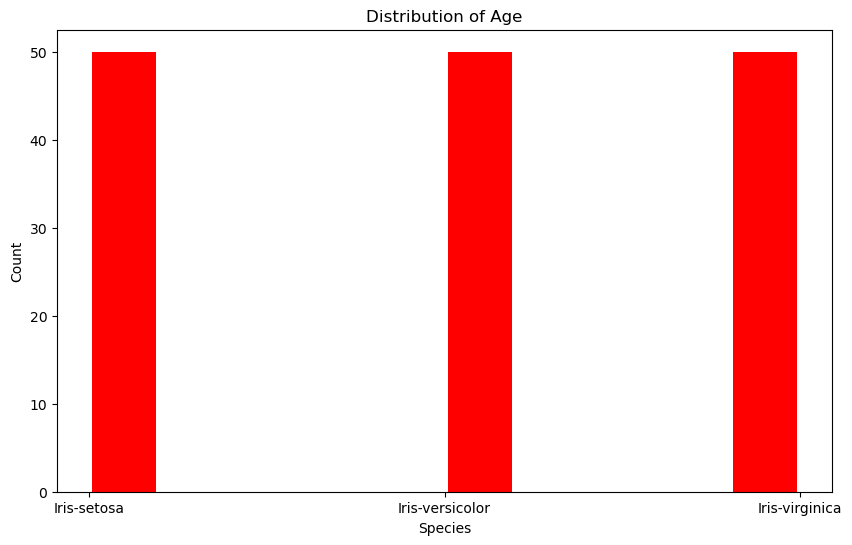

In [7]:
plt.figure(figsize=(10,6))
plt.hist(df['Species'],color = 'red', rwidth = 0.9)
plt.title('Distribution of Age')
plt.xlabel('Species')
plt.ylabel('Count')

In [8]:
X = df.iloc[:,[1,2,3,4]]

In [9]:
X

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [10]:
Y = df.iloc[:,[5]]
Y

,Species
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa
...,...
145,Iris-virginica
146,Iris-virginica
147,Iris-virginica
148,Iris-virginica


In [11]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest,Ytrain,Ytest = train_test_split(X,Y,random_state = 42,test_size = 0.25)

In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
scaler = StandardScaler()

In [14]:
Xtrain = scaler.fit_transform(Xtrain)
Xtest = scaler.fit_transform(Xtest)

In [16]:
from sklearn.naive_bayes import GaussianNB
gauss = GaussianNB()
gauss.fit(Xtrain,Ytrain)

C:\Users\Ankush Mehta\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [17]:
y_test_predict = gauss.predict(Xtest)

In [18]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [19]:
print(Y)

            Species
0       Iris-setosa
1       Iris-setosa
2       Iris-setosa
3       Iris-setosa
4       Iris-setosa
..              ...
145  Iris-virginica
146  Iris-virginica
147  Iris-virginica
148  Iris-virginica
149  Iris-virginica

[150 rows x 1 columns]


In [20]:
print(y_test_predict)

['Iris-versicolor' 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor' 'Iris-virginica'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-virginica'
 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica'
 'Iris-setosa' 'Iris-virginica' 'Iris-setosa' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor'
 'Iris-setosa' 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor'
 'Iris-setosa']


In [23]:
cm = confusion_matrix(Ytest,y_test_predict)
print(cm)
acc = accuracy_score(Ytest,y_test_predict)*100
print(acc)

[[15  0  0]
 [ 0 10  1]
 [ 0  0 12]]
97.36842105263158


In [25]:
#for sertosa class
tp = cm[0][0]
fn = cm[0][1] + cm[0][2]
fp = cm[1][0] + cm[2][0]
tn = cm[1][1] + cm[1][2] + cm[2][1] + cm[2][2]
total = tp+fp+tn+fn
print('Error rate:')
error= (fp+fn)/total
print(error)

Error rate:
0.0


In [26]:
#for versicolor class 
tp = cm[1][1]
fn = cm[1][0] + cm[1][2]
fp = cm[1][1] + cm[2][1]
tn = cm[0][0] + cm[0][2] + cm[2][0] + cm[2][2]
total = tp+fp+tn+fn
print('Error rate:')
error= (fp+fn)/total
print(error)

Error rate:
0.22916666666666666


In [27]:
#for verginica class 
tp = cm[2][2]
fn = cm[2][0] + cm[2][1]
fp = cm[0][2] + cm[1][2]
tn = cm[0][0] + cm[0][1] + cm[1][0] + cm[1][1]
total = tp+fp+tn+fn
print('Error rate:')
error= (fp+fn)/total
print(error)

Error rate:
0.02631578947368421


In [28]:
from sklearn.metrics import classification_report
print('                     classificaiton Report')
print(classification_report(Ytest,y_test_predict))

                     classificaiton Report
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       1.00      0.91      0.95        11
 Iris-virginica       0.92      1.00      0.96        12

       accuracy                           0.97        38
      macro avg       0.97      0.97      0.97        38
   weighted avg       0.98      0.97      0.97        38

